In [2]:
import scipy
import numpy as np
import LabModule as  lab
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import least_squares, curve_fit

In [3]:
pixel       = np.arange(2048)                                        # Number of pixels (dimensionless).

pixel_width = 14e-06                                                 # Distance (m).

x           = pixel*pixel_width                                      # Distance (m).

f = 150e-3                                                             # Focal length (m).

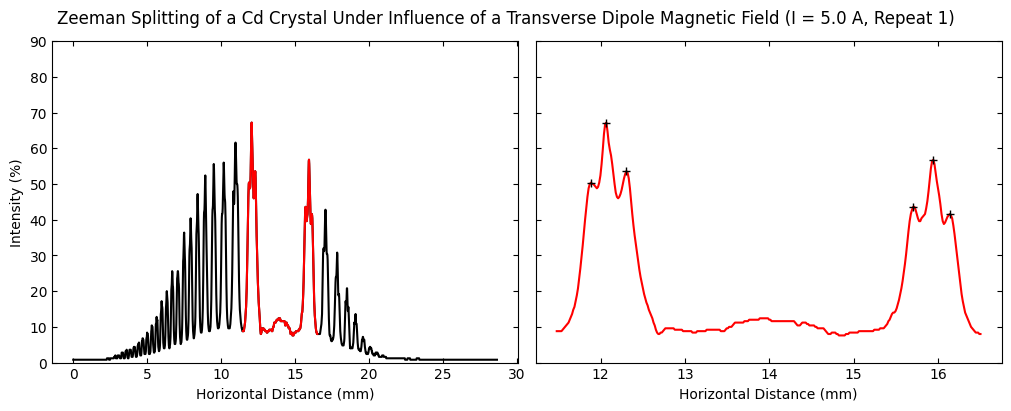

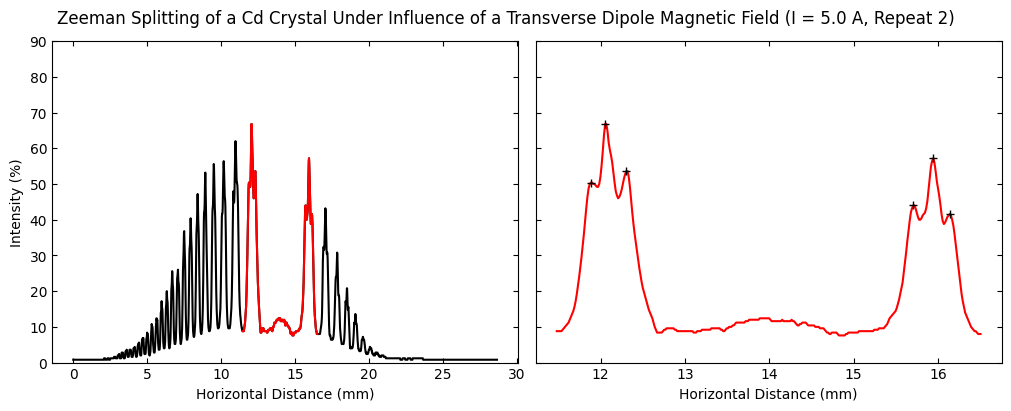

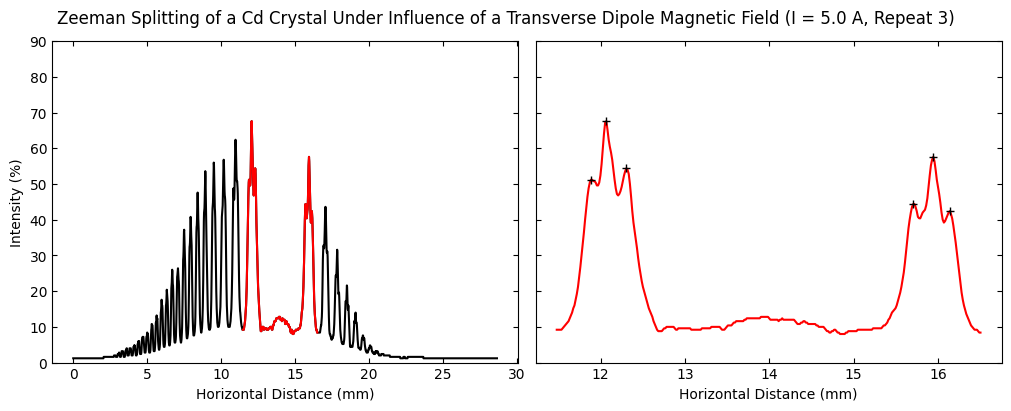

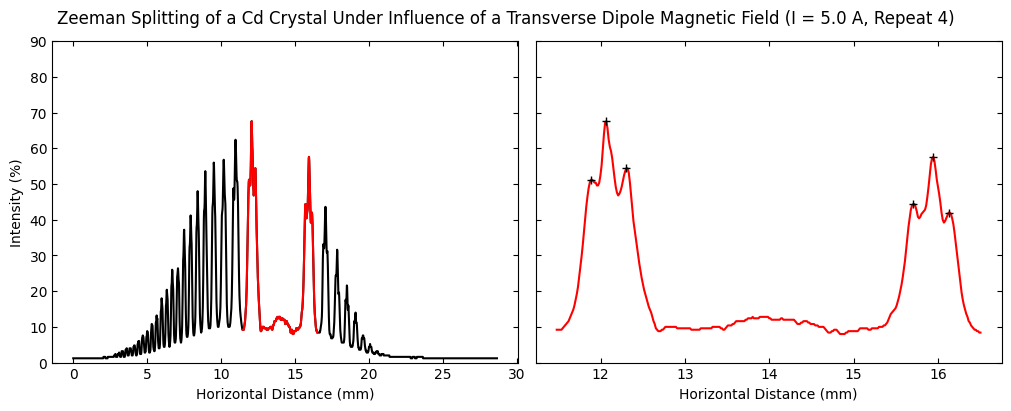

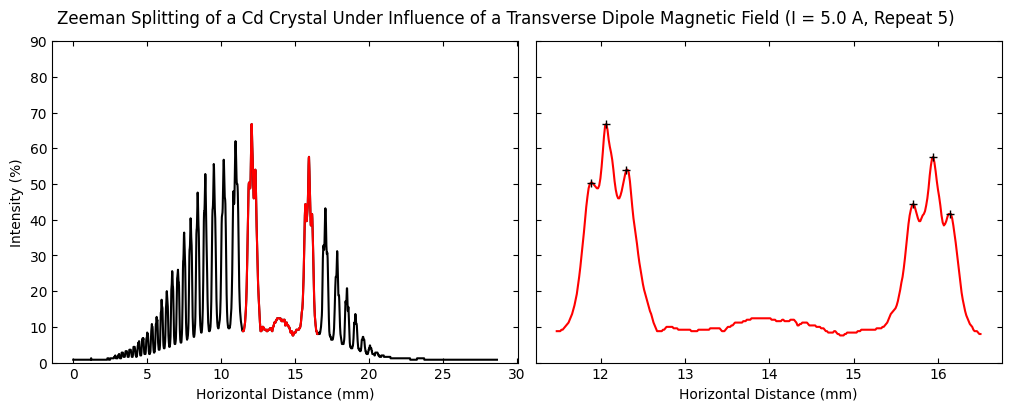

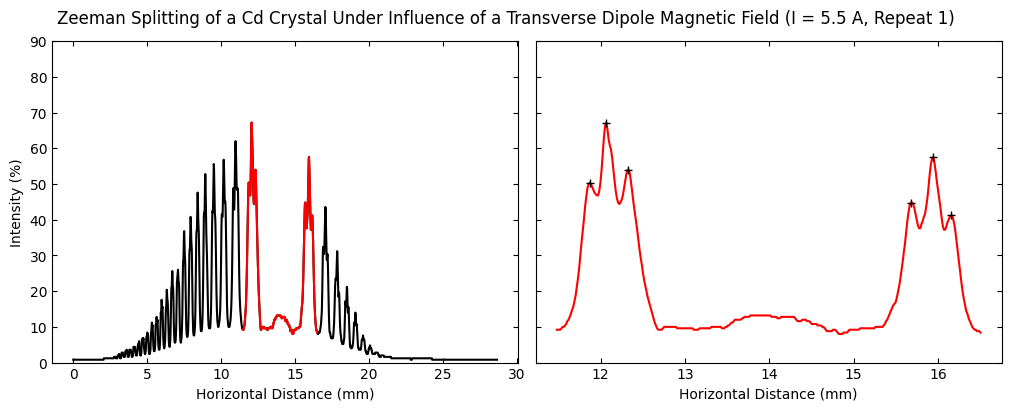

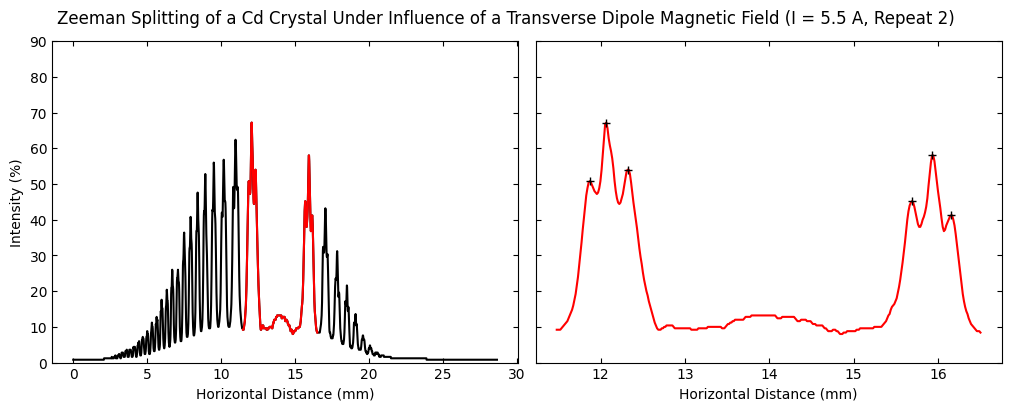

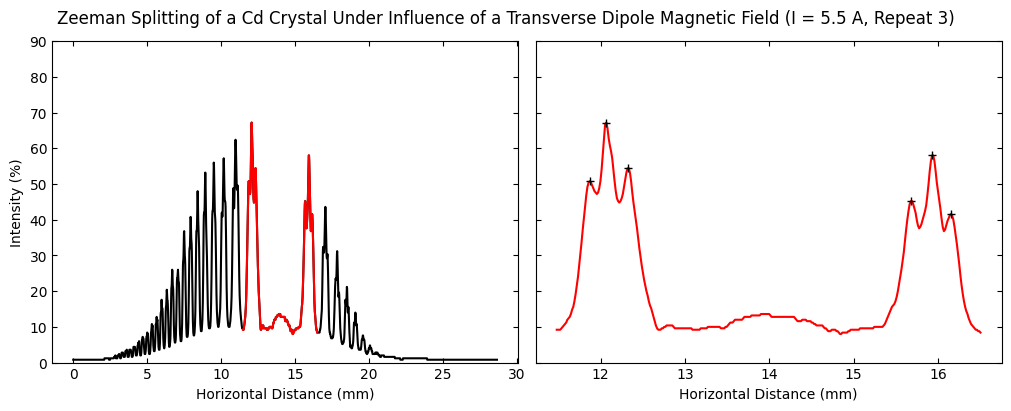

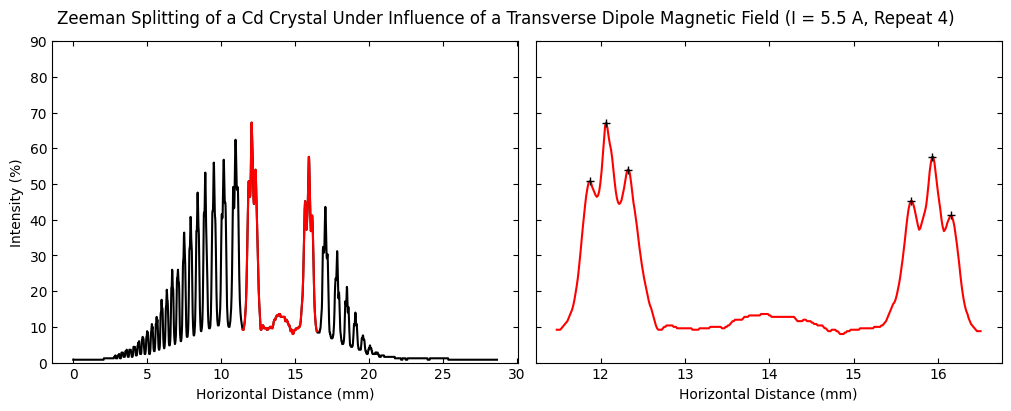

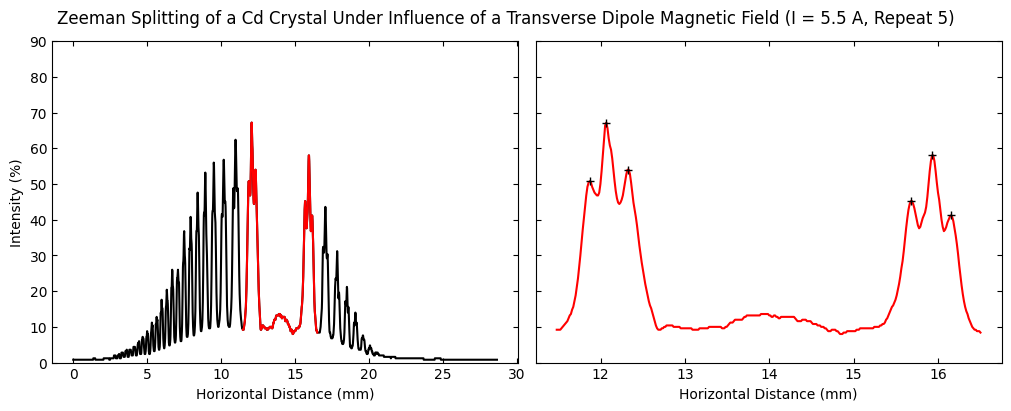

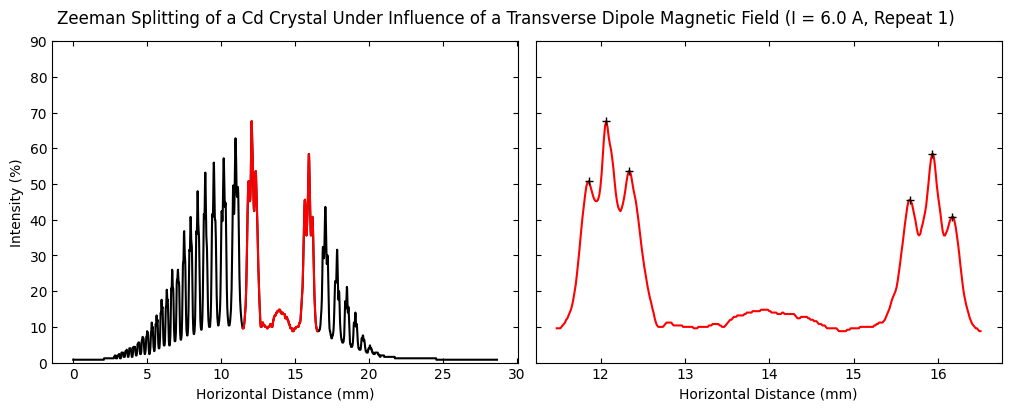

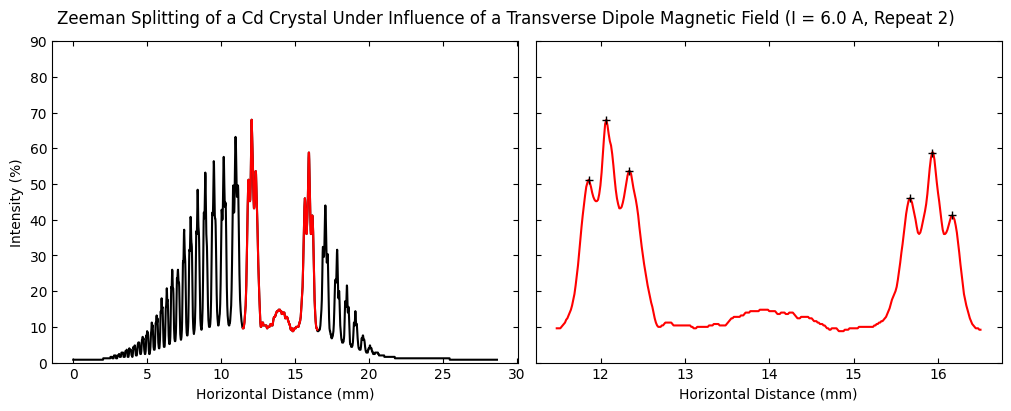

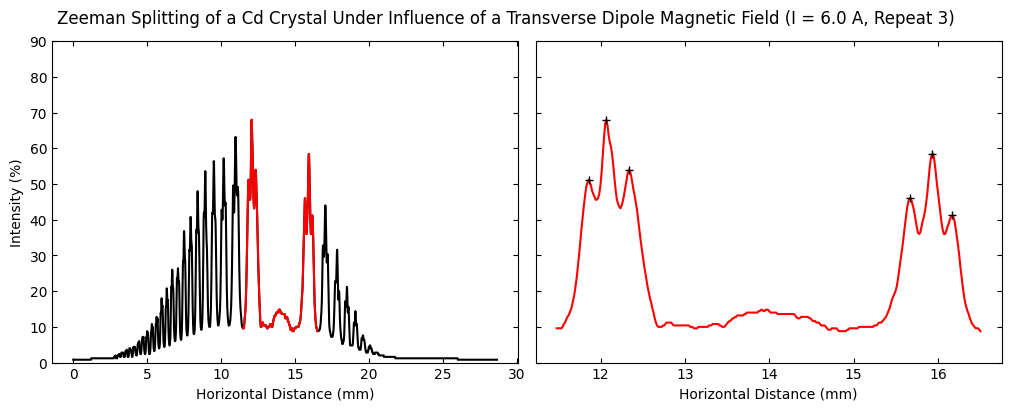

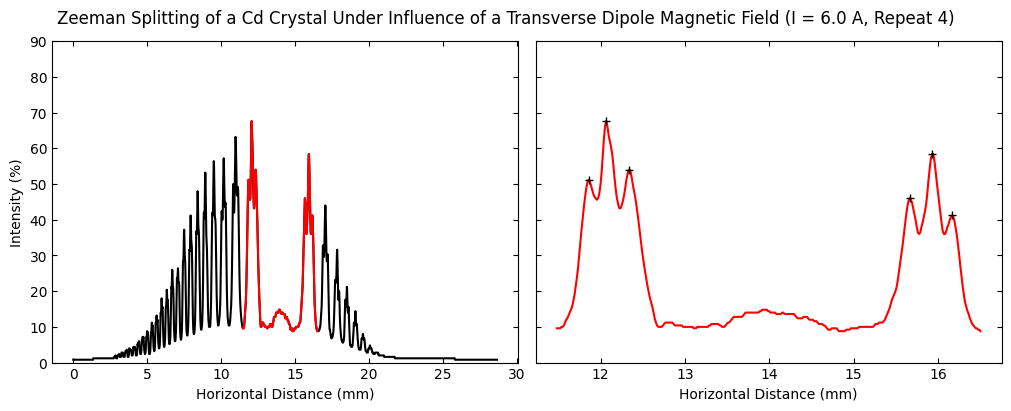

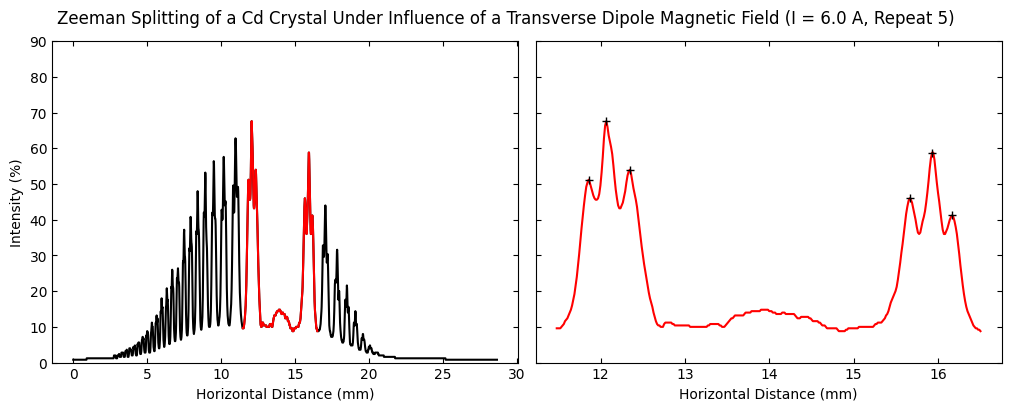

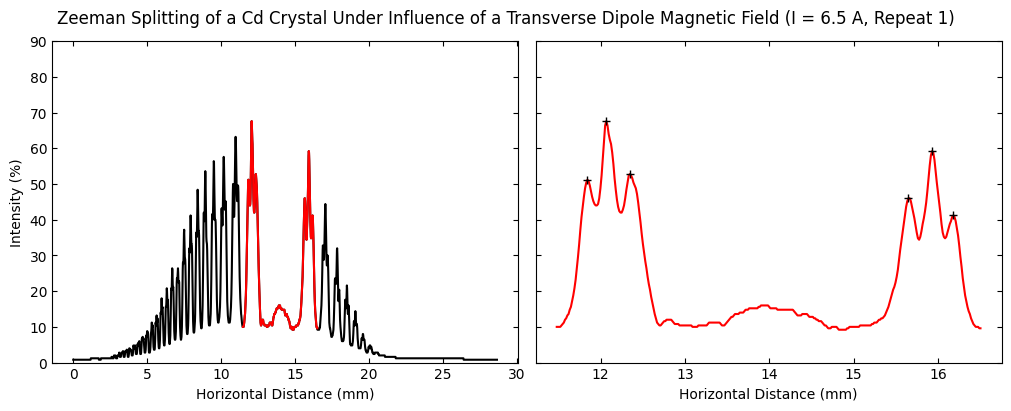

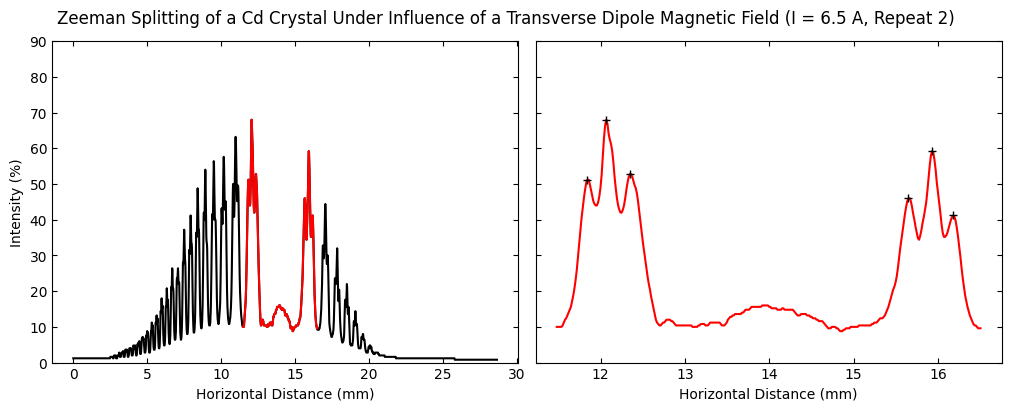

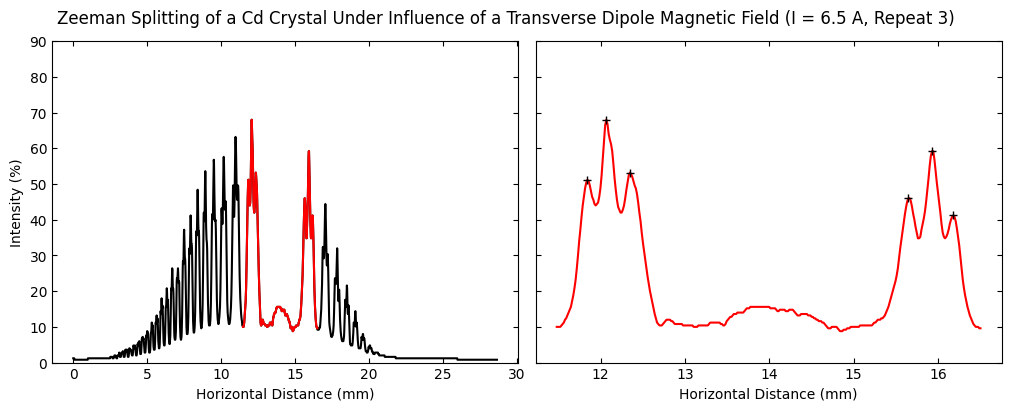

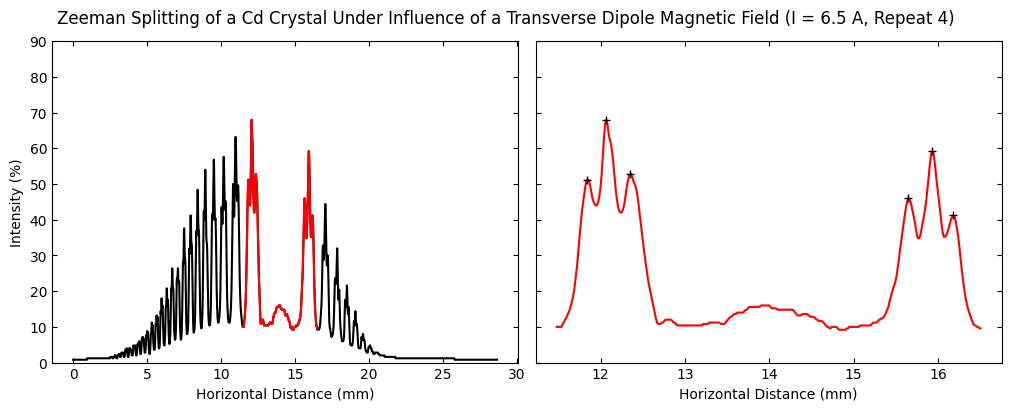

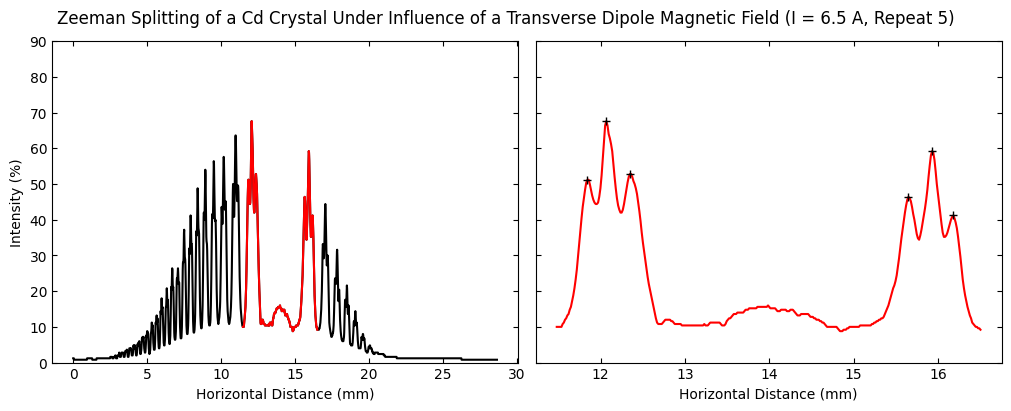

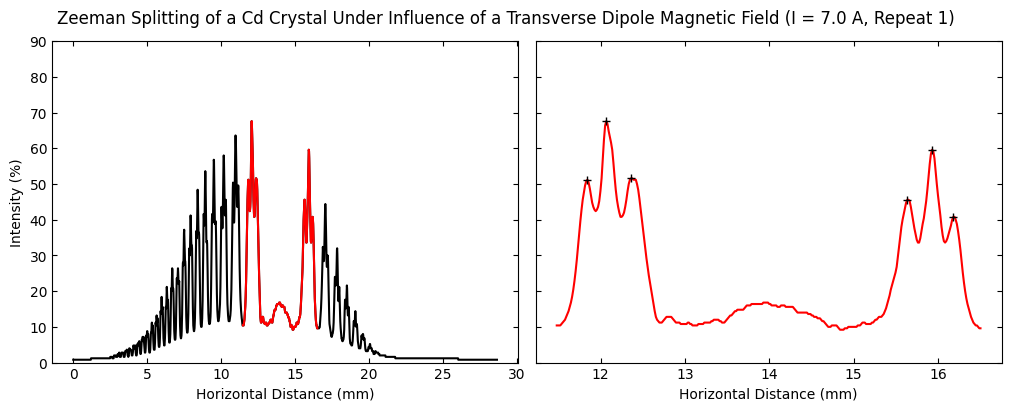

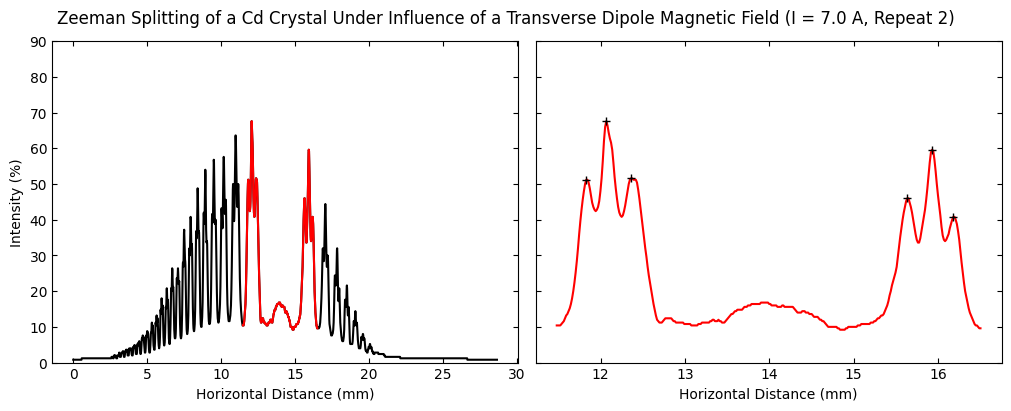

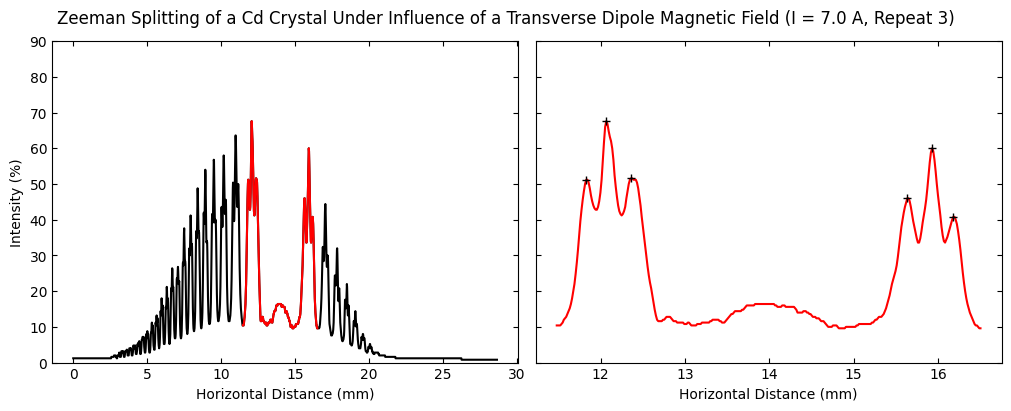

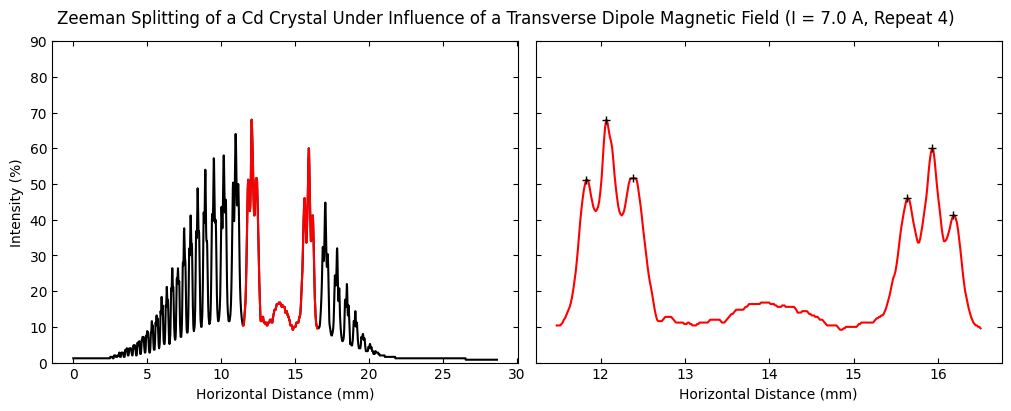

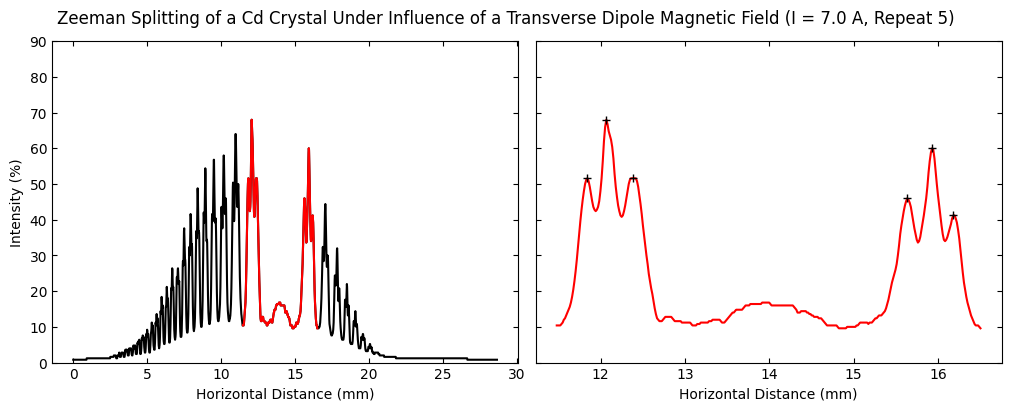

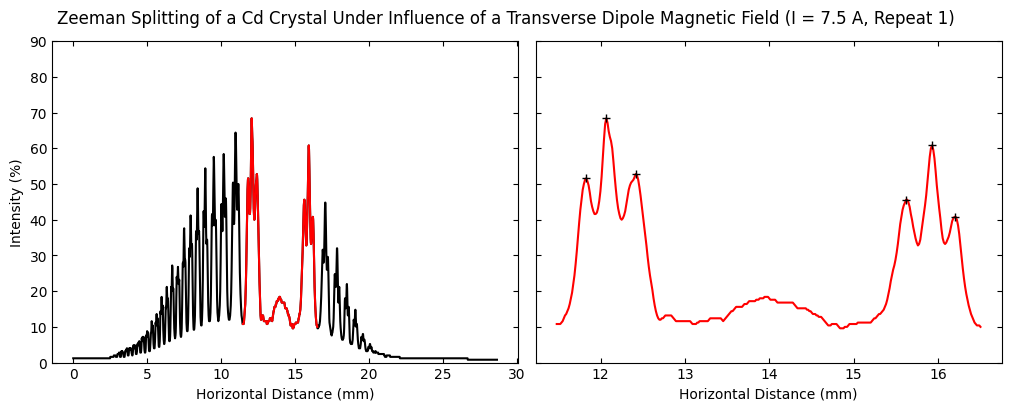

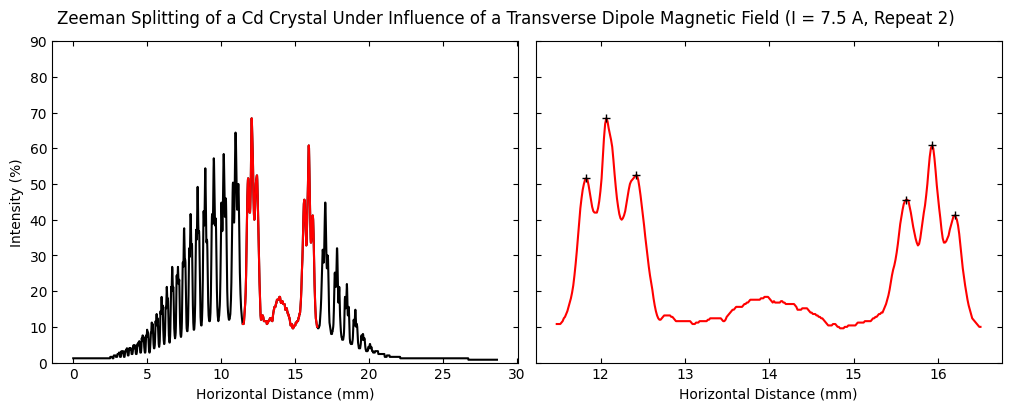

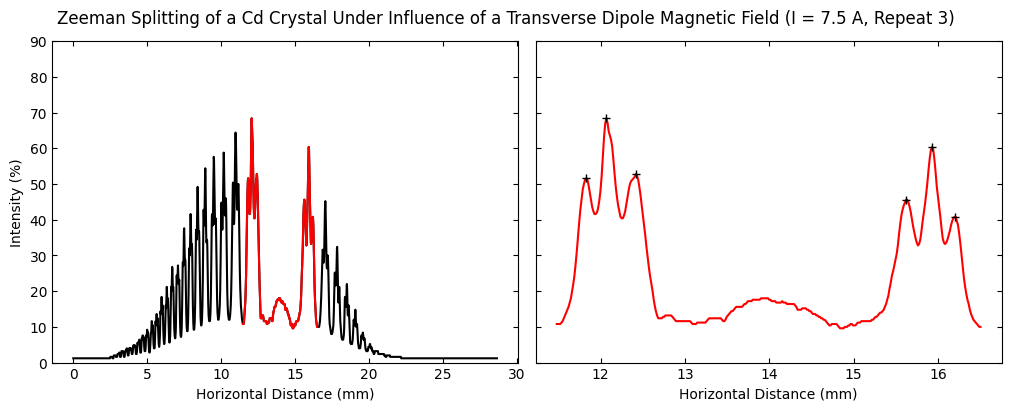

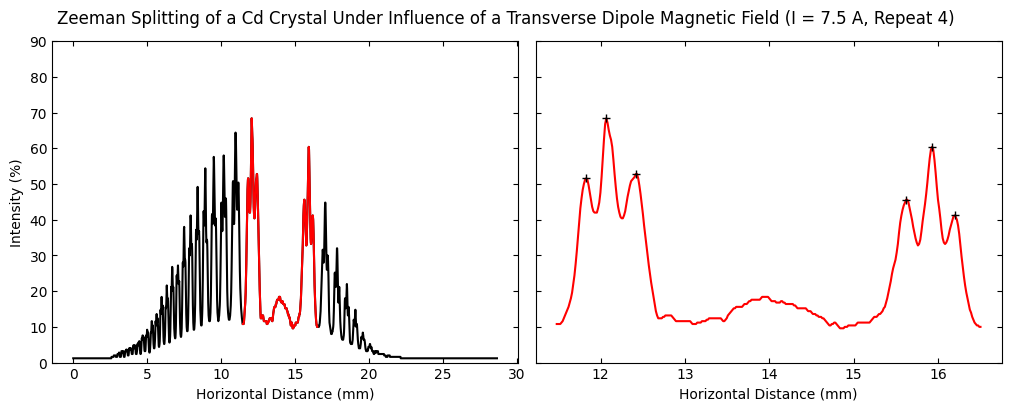

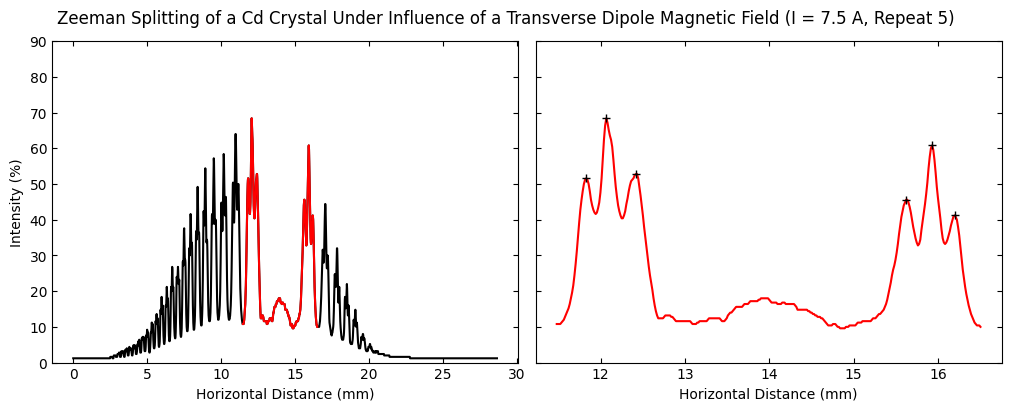

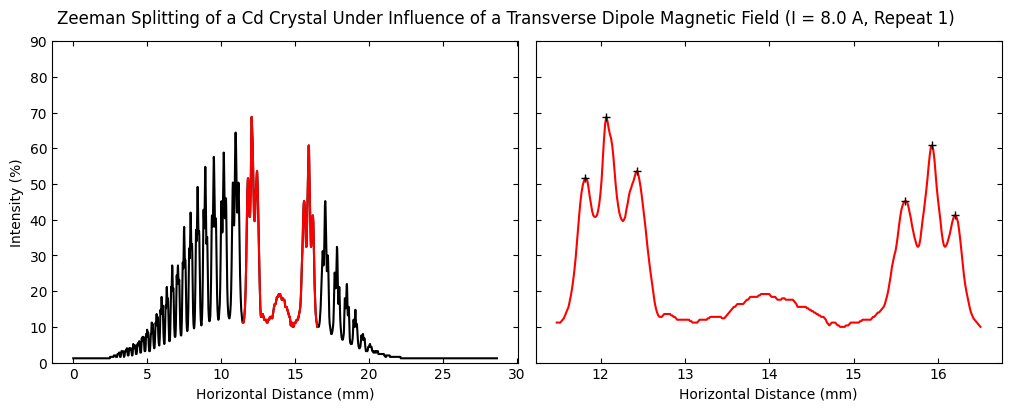

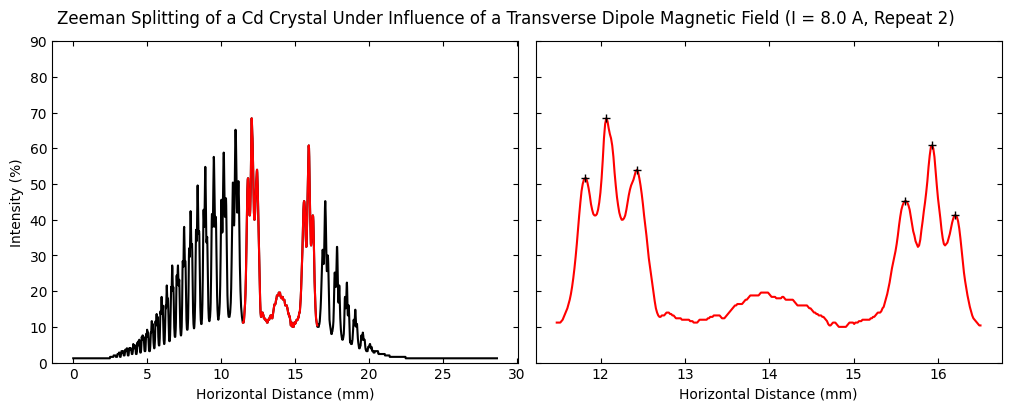

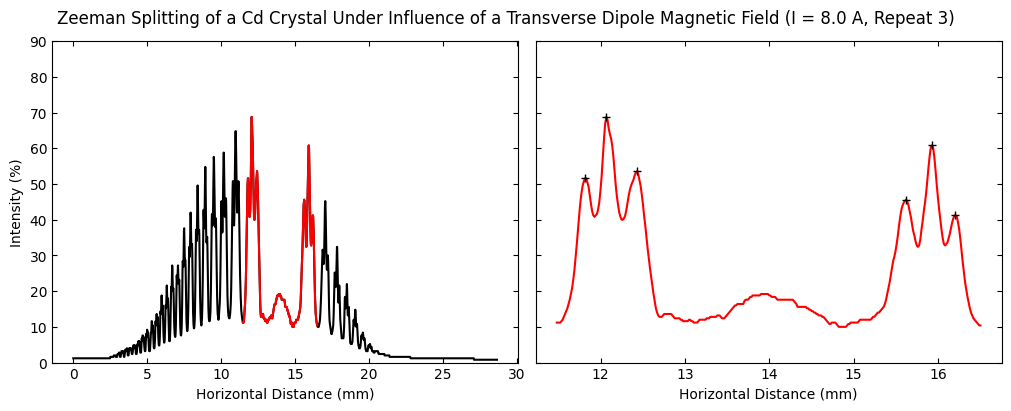

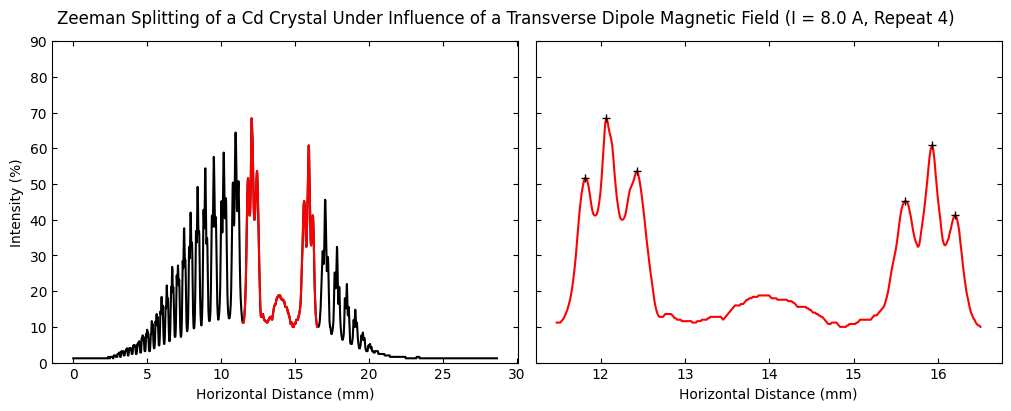

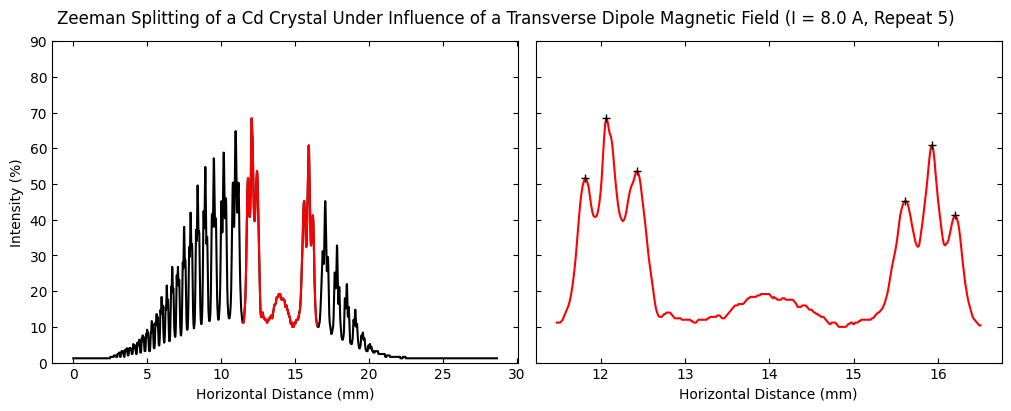

d0 (pixels): [[277. 278. 277. 277. 277.]
 [277. 276. 276. 276. 276.]
 [276. 276. 276. 276. 276.]
 [276. 276. 276. 276. 276.]
 [276. 276. 276. 276. 276.]
 [276. 276. 276. 276. 276.]
 [276. 276. 276. 276. 276.]]
d1 (pixels): [[243. 243. 243. 243. 243.]
 [240. 241. 240. 240. 240.]
 [238. 238. 238. 238. 237.]
 [236. 236. 236. 236. 236.]
 [234. 234. 234. 232. 232.]
 [229. 229. 229. 229. 229.]
 [227. 227. 228. 227. 227.]]
d2 (pixels): [[304. 304. 304. 303. 304.]
 [306. 306. 306. 306. 306.]
 [308. 308. 308. 308. 308.]
 [310. 310. 310. 310. 310.]
 [310. 311. 311. 311. 310.]
 [312. 312. 312. 312. 312.]
 [313. 313. 313. 313. 313.]]


In [4]:
y_min   = 0  # Minimum Y-axis value (%).
y_max   = 90 # Maximum Y-axis value (%).

x_min = 820  # Minimum X-axis red window value (pixels).
x_max = 1180 # Minimum X-axis red window value (pixels).

current_string = ['50', '55', '60', '65', '70', '75', '80']
repeat_string = ['_1.txt', '_2.txt', '_3.txt', '_4.txt', '_5.txt']

d0 = np.zeros((7,5))
d1 = np.zeros((7,5))
d2 = np.zeros((7,5))

for i in range(len(current_string)):
    for j in range(len(repeat_string)):
        

        raw_data = np.loadtxt(current_string[i]+repeat_string[j], skiprows = 2, usecols = 0, max_rows = 2048)

        peaks = find_peaks(raw_data[x_min:x_max], height=30) # Find the peaks of your data within the given red window size.
        ##above addapted for a minimum height of the peaks as to avoid the noise being counted as a peak
        peaks = np.array(peaks[0])

        fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = [10, 4])
        fig.suptitle(f'Zeeman Splitting of a Cd Crystal Under Influence of a Transverse Dipole Magnetic Field (I = {float(current_string[i])/10} A, Repeat {j+1})')
        ax[0].tick_params(direction = 'in', bottom = 'true', top = 'true', left = 'true', right = 'true')
        ax[1].tick_params(direction = 'in', bottom = 'true', top = 'true', left = 'true', right = 'true')
        ax[1].axes.yaxis.set_ticklabels([])
        ax[0].set_ylim(y_min, y_max)
        ax[1].set_ylim(y_min, y_max)
        ax[0].plot(x*1e03, raw_data, color = 'k') # Plot the full dataset.
        ax[0].plot(x[x_min:x_max]*1e03, raw_data[x_min:x_max], color = 'r') # Plot the red window.
        ax[1].plot(x[x_min:x_max]*1e03, raw_data[x_min:x_max], color = 'r') # Plot the red window.
        ax[0].set_ylabel('Intensity (%)')
        ax[0].set_xlabel('Horizontal Distance (mm)')
        ax[1].set_xlabel('Horizontal Distance (mm)')

        for k in range(len(peaks)):
            ax[1].plot(x[x_min+peaks[k]]*1e03, raw_data[x_min+peaks[k]],'+', color = 'k') # Plot the peaks.

        plt.savefig('Figure1.png', dpi = 300, bbox_inches = 'tight') # Save the figure.
        plt.show()

        d0[i,j] = peaks[4] - peaks[1] # Width, diameter (pixels).
        d1[i,j] = peaks[3] - peaks[2] # Width, diameter (pixels).
        d2[i,j] = peaks[5] - peaks[0] # Width, diameter (pixels).
        
print("d0 (pixels):", d0)
print("d1 (pixels):", d1)
print("d2 (pixels):", d2)

In [5]:
#converting diameters from pixels to metres
d0_metres = d0 * pixel_width
d1_metres = d1 * pixel_width
d2_metres = d2 * pixel_width

In [6]:
#calculating means and errors
d0_mean = np.mean(d0_metres, axis=1)
d0_std = np.std(d0_metres, axis=1)
d0_err = d0_std / np.sqrt(d0_metres.shape[1])
d1_mean = np.mean(d1_metres, axis=1)
d1_std = np.std(d1_metres, axis=1)
d1_err = d1_std / np.sqrt(d1_metres.shape[1])
d2_mean = np.mean(d2_metres, axis=1)
d2_std = np.std(d2_metres, axis=1)
d2_err = d2_std / np.sqrt(d2_metres.shape[1])

In [7]:
#calculating alpha values and errors
alpha_0 = d0_mean/(2*f)
alpha_0_err = d0_err/(2*f)
print("Alpha_0 (radians):", alpha_0)
print("Alpha_0 error (radians):", alpha_0_err)
alpha_1 = d1_mean/(2*f)
alpha_1_err = d1_err/(2*f)
print("Alpha_1 (radians):", alpha_1)
print("Alpha_1 error (radians):", alpha_1_err)
alpha_2 = d2_mean/(2*f)
alpha_2_err = d2_err/(2*f)
print("Alpha_2 (radians):", alpha_2)
print("Alpha_2 error (radians):", alpha_2_err)

Alpha_0 (radians): [0.012936   0.01288933 0.01288    0.01288    0.01288    0.01288
 0.01288   ]
Alpha_0 error (radians): [8.34798712e-06 8.34798712e-06 6.46493269e-19 6.46493269e-19
 6.46493269e-19 6.46493269e-19 6.46493269e-19]
Alpha_1 (radians): [0.01134    0.01120933 0.01109733 0.01101333 0.01088267 0.01068667
 0.01060267]
Alpha_1 error (radians): [0.00000000e+00 8.34798712e-06 8.34798712e-06 0.00000000e+00
 2.04483088e-05 6.46493269e-19 8.34798712e-06]
Alpha_2 (radians): [0.01417733 0.01428    0.01437333 0.01446667 0.01449467 0.01456
 0.01460667]
Alpha_2 error (radians): [8.34798712e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.02241544e-05 0.00000000e+00 0.00000000e+00]


In [8]:
def wavelength(alphatop, alphabottom):
    '''
    A function to calculate delta lambda/lambda0 from two angles for one etalon with n=1.457
    '''
    n = 1.457
    numerator = np.sqrt(n**2 - (np.sin(alphatop))**2)
    denominator = np.sqrt(n**2 - (np.sin(alphabottom))**2)
    lambda_ratio = (numerator / denominator) - 1
    return lambda_ratio
    
def wavelength_err(alphatop, alphabottom, alphatop_err, alphabottom_err):
    '''
    A function to calculate the error in delta lambda/lambda0 from two angles and their errors for one etalon with n=1.457
    '''
    n = 1.457
    term1 = (np.sin(alphatop) * np.cos(alphatop)) / ((np.sqrt(n**2 - (np.sin(alphatop))**2))*np.sqrt(n**2 - (np.sin(alphabottom))**2))
    term2 = (np.sin(alphabottom) * np.cos(alphabottom) * np.sqrt(n**2 - (np.sin(alphatop))**2)) / ((np.sqrt(n**2 - (np.sin(alphabottom))**2))**3)
    lambda_ratio_err = np.sqrt( (term1 * alphatop_err)**2 + (term2 * alphabottom_err)**2 )
    return lambda_ratio_err

def error(alphatop, alphabottom, alphatop_err, alphabottom_err):
    
    n = 1.457
    a1 = (1-(np.sin(alphatop)/n)**2)**-0.5
    a2 = (1-(np.sin(alphabottom)/n)**2)**-0.5
    a3 = np.cos(alphatop)*np.sin(alphatop)
    
    b1 = (1-(np.sin(alphabottom)/n)**2)**0.5
    b2 = -(1-(np.sin(alphatop)/n)**2)**-1.5
    b3 = np.cos(alphabottom)*np.sin(alphabottom)
    
    err = np.sqrt((alphabottom_err**2)*(a1*a2*a3)**2 + (alphatop_err**2)*(b1*b2*b3)**2)
    
    return err

In [9]:
ratio_1 = wavelength(alpha_1, alpha_0)
print(ratio_1)
ratio_1_err = wavelength_err(alpha_1, alpha_0, alpha_1_err, alpha_0_err)
print(ratio_1_err)
ratio_1_error = error(alpha_1, alpha_0, alpha_1_err, alpha_0_err)
print(ratio_1_error)
ratio_2 = wavelength(alpha_2, alpha_0)
print(ratio_2)
ratio_2_err = wavelength_err(alpha_2, alpha_0, alpha_2_err, alpha_0_err)
print(ratio_2_err)
ratio_2_error = error(alpha_2, alpha_0, alpha_2_err, alpha_0_err)
print(ratio_2_error)

[9.12536674e-06 9.53548688e-06 1.00672727e-05 1.05047204e-05
 1.11785887e-05 1.21743125e-05 1.25955121e-05]
[5.08689086e-08 6.71714869e-08 4.36390420e-08 3.92239417e-21
 1.04825855e-07 5.09675616e-21 4.16940127e-08]
[9.46646564e-08 1.42591827e-07 1.07515338e-07 7.11995173e-21
 2.63356838e-07 1.08193317e-20 1.07514522e-07]
[-7.92692709e-06 -8.89887847e-06 -9.58538108e-06 -1.02193398e-05
 -1.04103274e-05 -1.08574010e-05 -1.11779701e-05]
[7.54685571e-08 5.06844972e-08 3.92231537e-21 3.92231289e-21
 6.98062257e-08 3.92231038e-21 3.92230913e-21]
[1.60210659e-07 1.19203440e-07 9.29179864e-21 9.35212414e-21
 1.31686948e-07 9.41244943e-21 9.44261200e-21]


In [10]:
h = 6.63e-34
c = 3e8
lambda_0 = 643.847e-9
E1 = -(h*c/(lambda_0)) * ratio_1
E1_err = -(h*c/(lambda_0)) * ratio_1_error
print("Energy splitting 1 (J):", E1)
print("Energy splitting error 1 (J):", E1_err)
E2 = -(h*c/(lambda_0)) * ratio_2
E2_err = -(h*c/(lambda_0)) * ratio_2_error
print("Energy splitting 2 (J):", E2)
print("Energy splitting error 2 (J):", E2_err)

Energy splitting 1 (J): [-2.81904776e-24 -2.94574385e-24 -3.11002543e-24 -3.24516366e-24
 -3.45333796e-24 -3.76094126e-24 -3.89106008e-24]
Energy splitting error 1 (J): [-2.92442151e-26 -4.40500840e-26 -3.32141031e-26 -2.19952628e-39
 -8.13573336e-26 -3.34235474e-39 -3.32138512e-26]
Energy splitting 2 (J): [2.44882060e-24 2.74908003e-24 2.96115738e-24 3.15700265e-24
 3.21600336e-24 3.35411529e-24 3.45314687e-24]
Energy splitting error 2 (J): [-4.94929697e-26 -3.68248422e-26 -2.87046263e-39 -2.88909864e-39
 -4.06813015e-26 -2.90773459e-39 -2.91705254e-39]


In [11]:
def b_field(current):
    '''
    A function to calculate the magnetic field strength in mT from the current through the dipole magnet
    '''
    B = -0.9421*current**3 + 6.1937*current**2 + 86.975*current + 7.3701
    return B

current = np.array([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]) #current in Amps
B_field_mT = b_field(current)
print("Magnetic field strength (mT):", B_field_mT)

Magnetic field strength (mT): [479.3251    516.3501375 548.6997    575.6672125 596.5461    610.6297875
 617.2117   ]


In [14]:
def consistency_check(x, xerr, y, yerr):
    lhs = np.abs(x-y)
    rhs = 3*np.sqrt(xerr**2+yerr**2)
    
    if lhs < rhs:
        print('The values are consistent')
        
    else:
        print('The values are inconsistent')

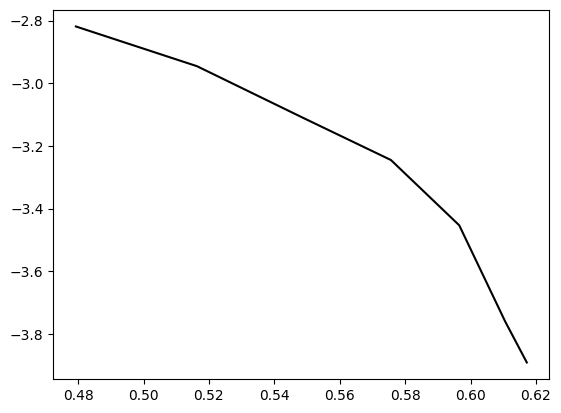

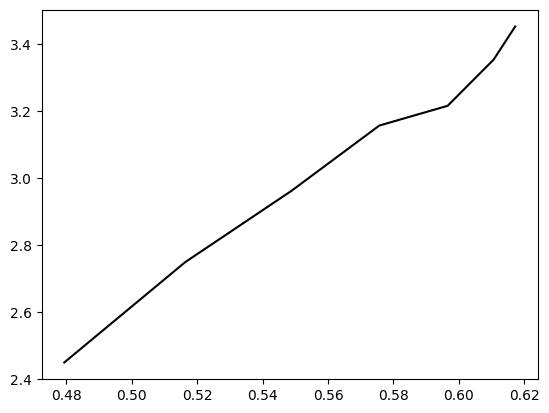

In [15]:
xdata = B_field_mT*1E-3 # x-data
xerror = np.full(len(xdata), 0.007) # Error Tesla.

ydata_1 = E1 # y-data
yerror_1 = E1_err # y-errors

ydata_2 = E2 # y-data
yerror_2 = E2_err # y-errors

ysf = 1E24
plt.clf()
plt.plot(xdata, ydata_1*ysf, color = 'k')
plt.show()

plt.clf()
plt.plot(xdata, ydata_2*ysf, color = 'k')
plt.show()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9200e+01                                    5.17e+00    
       1              2         1.7184e+01      2.02e+00       9.03e-01       4.05e-01    
       2              3         1.7165e+01      1.87e-02       1.06e-01       4.40e-03    
       3              4         1.7165e+01      2.30e-06       1.20e-03       1.29e-06    
       4              5         1.7165e+01      4.12e-13       3.73e-07       1.40e-06    
       5              7         1.7165e+01      4.62e-14       5.45e-08       1.38e-07    
`xtol` termination condition is satisfied.
Function evaluations 7, initial cost 1.9200e+01, final cost 1.7165e+01, first-order optimality 1.38e-07.

=== Fit quality ===
chisq per point = 
 [11.856  0.111  2.139  8.944  5.726  0.785  4.769]
chisq =   34.33, ndf = 5, chisq/NDF =   6.866, chisq prob = 2.0467e-06

=== Fitted parameters ===
Intercept (c) =  1.3623 +

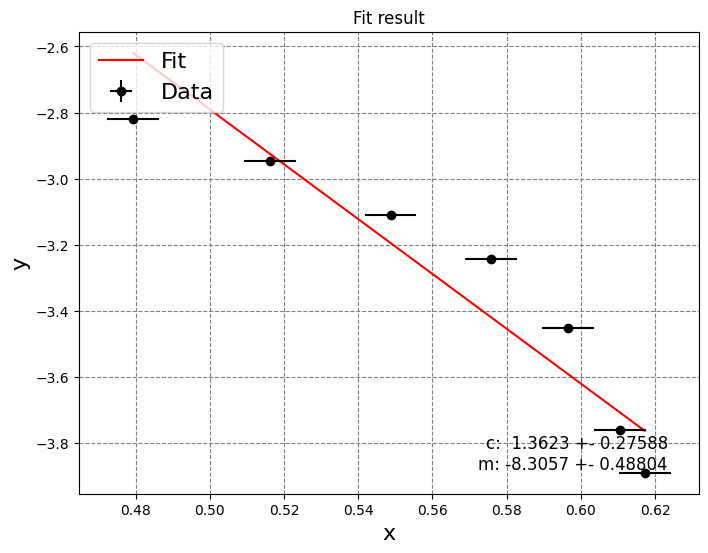

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4951e+78                                    3.35e+86    
       1              2         3.0241e+21      2.50e+78       1.49e-08       2.03e+29    
       2              3         3.3601e+20      2.69e+21       2.99e-08       1.13e+28    
       3              4         6.1717e+19      2.74e+20       5.99e-08       1.04e+27    
       4              5         1.3441e+19      4.83e+19       1.20e-07       1.13e+26    
       5              6         3.1469e+18      1.03e+19       2.40e-07       1.32e+25    
       6              7         7.6194e+17      2.38e+18       4.80e-07       1.60e+24    
       7              8         1.8750e+17      5.74e+17       9.61e-07       1.97e+23    
       8              9         4.6507e+16      1.41e+17       1.92e-06       2.44e+22    
       9             10         1.1581e+16      3.49e+16       3.84e-06       3.04e+21    

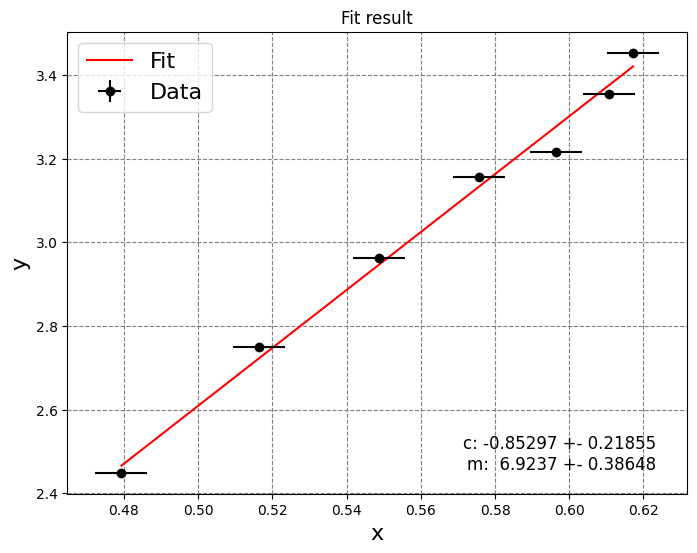

(<Figure size 800x600 with 1 Axes>,
 array([-0.853,  6.924]),
 array([0.219, 0.386]),
 np.float64(0.6038694678929608))

In [16]:
init_params = np.flip(np.polyfit(xdata, ydata_1*ysf, 1))
lab.fit(xdata, ydata_1*ysf, abs(xerror), abs(yerror_1), init_params)

lab.fit(xdata, ydata_2*ysf, abs(xerror), abs(yerror_2), [0,0])

In [17]:
m1 = 8.3057e-24
m1err = 0.48804e-24

m2 =6.9237e-24
m2err = 0.38648e-24

bohr = 9.274e-24

consistency_check(m1, m1err, bohr, 0)
consistency_check(m2, m2err, bohr, 0)

The values are consistent
The values are inconsistent
